<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tahun                    30 non-null     int64 
 1   Provinsi                 30 non-null     object
 2   Luas Panen (Ha)          30 non-null     int64 
 3   Produksi Padi (Ton GKG)  30 non-null     int64 
 4   Produksi Beras (Ton)     30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB
None
   Tahun       Provinsi  Luas Panen (Ha)  Produksi Padi (Ton GKG)  \
0   2020         Banten           139000                   486200   
1   2020    DKI Jakarta             2800                    14000   
2   2020     Jawa Barat          1580000                  9140000   
3   2020    Jawa Tengah          1690000                  9460000   
4   2020  DI Yogyakarta           104000                   580000   

   Produksi Beras (Ton)  
0                286000  
1    

C:\Users\maula\AppData\Local\Temp\ipykernel_48048\3856939801.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banten_df.rename(columns={


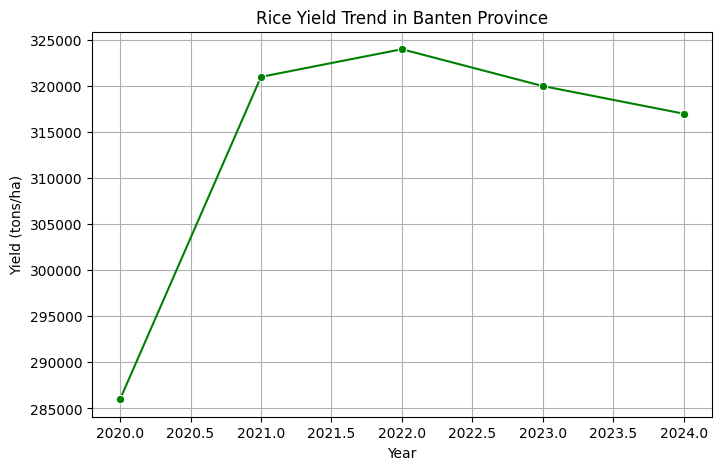

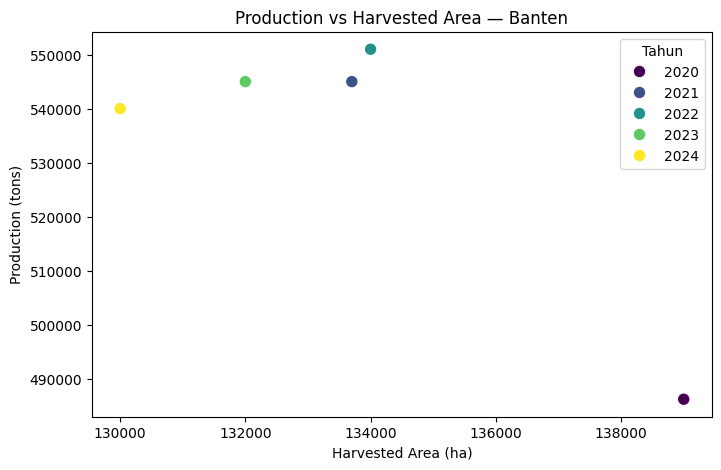


Average Yield per Year (Banten):
   Tahun  Produksi Beras (Ton)
0   2020              286000.0
1   2021              321000.0
2   2022              324000.0
3   2023              320000.0
4   2024              317000.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_padi = pd.read_excel("./Padi/Padi/Datapadi_Laporan.xlsx")

print(df_padi.info())
print(df_padi.head())

banten_df = df_padi[df_padi['Provinsi'].str.contains('Banten', case=False, na=False)]

print("\nFiltered Banten Data:")
print(banten_df.head())

banten_df.rename(columns={
    'Year': 'Year',
    'Production (ton)': 'Produksi Padi (Ton GKG)',
    'Harvested Area (ha)': 'Luas Panen (Ha)',
    'Yield (ton/ha)': 'Produksi Beras (Ton)'
}, inplace=True)


print("\nDescriptive Statistics for Banten:")
print(banten_df.describe())

plt.figure(figsize=(8,5))
sns.lineplot(data=banten_df, x='Tahun', y='Produksi Beras (Ton)', marker='o', color='green')
plt.title("Rice Yield Trend in Banten Province")
plt.xlabel("Year")
plt.ylabel("Yield (tons/ha)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=banten_df, x='Luas Panen (Ha)', y='Produksi Padi (Ton GKG)', hue='Tahun', palette='viridis', s=80)
plt.title("Production vs Harvested Area — Banten")
plt.xlabel("Harvested Area (ha)")
plt.ylabel("Production (tons)")
plt.show()

yield_summary = banten_df.groupby('Tahun')['Produksi Beras (Ton)'].mean().reset_index()
print("\nAverage Yield per Year (Banten):")
print(yield_summary)
